# Gradient Boosting

**Project Goal**: 

In [1]:
import pickle

import ipywidgets as widgets
import pandas as pd

from imblearn.over_sampling import RandomOverSampler

from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline


#### Import Data

In [23]:
def wrangle(url):
    df = pd.read_csv(url)
    #Re-code the class variable to True = 1, and False = 0:
    df['class'] = df['class'].replace({0: False, 1: True})
    
    #Rename the class variable to bankrupt
    df = df.rename(columns={'class': 'bankrupt'})#.set_index("year")

    return df

In [3]:
df = wrangle("https://archive.ics.uci.edu/static/public/365/data.csv")
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15592\2605450084.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({0: False, 1: True})


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,False
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,False


Split Data

Split data vertically into X (the features) and y(the target)

In [4]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (43405, 65)
y shape: (43405,)


Split Data horizontally - train and test sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34724, 65)
y_train shape: (34724,)
X_test shape: (8681, 65)
y_test shape: (8681,)


Resample - Oversampling

In [6]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (66094, 65)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,4,0.123380,0.65465,0.167430,1.3677,20.6430,0.000000,0.153440,0.527520,1.57590,...,1632.90,0.101310,0.357260,0.904810,0.577270,24.7600,3.2519,105.450,3.4613,4.1772
1,4,0.075698,0.53005,0.280120,1.9523,NaN,0.007546,0.075698,0.886630,1.55670,...,10814.00,1.000000,0.161070,0.008046,0.039749,8.8171,7.3121,68.965,5.2925,3.6566
2,3,-0.208240,1.01360,0.060209,1.0709,-2.7386,-0.029242,-0.207020,-0.013465,6.74300,...,158.40,-0.013098,15.257000,1.030500,-2.954900,63.2450,8.5687,45.946,7.9441,74.1180
3,5,-0.406220,0.49377,0.292250,1.7345,23.1840,0.000000,-0.406220,1.025200,2.89030,...,610.21,-0.115330,-0.802440,1.136600,0.160830,43.2150,5.1101,50.247,7.2642,9.3215
4,2,-0.020526,0.27326,0.070290,1.2605,17.9460,-0.020526,-0.020526,2.502900,0.99567,...,871.98,-0.004346,-0.030012,1.004300,0.004955,44.1130,3.2073,101.840,3.5839,1.4658


#### Build Model

Baseline Model

In [7]:
acc_baseline = y_train.value_counts(normalize=True).max().round(4)
print("Baseline Accuracy:", acc_baseline)

Baseline Accuracy: 0.9517


Iterate

The first step is to create a pipeline for gradient boosting classifier

In [8]:
clf = make_pipeline(SimpleImputer(), GradientBoostingClassifier())

Hyperparemeter Grid

In [9]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "gradientboostingclassifier__n_estimators": range(20,31,5),
    "gradientboostingclassifier__max_depth": range(2, 5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

Grid Search Cv

In [10]:
model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1,verbose=1)

Fitting the Model

In [11]:
# Fit model to over-sampled training data
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

CV Results

In [12]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,118.476476,0.528264,0.069023,0.009497,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.877676,0.871549,0.880097,0.878281,0.873506,0.876222,0.003181,1
17,99.262998,17.538663,0.043021,0.011797,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.871700,0.871170,0.881912,0.877071,0.876986,0.875768,0.003965,2
14,99.311303,0.970116,0.066172,0.002981,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.871095,0.865799,0.871549,0.869052,0.869950,0.869489,0.002041,3
15,101.055286,0.540882,0.076969,0.004245,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.859672,0.859293,0.872456,0.861412,0.871539,0.864874,0.005867,4
12,81.656175,1.204446,0.067535,0.005245,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.861185,0.856041,0.861260,0.858613,0.864276,0.860275,0.002775,5
13,79.936983,0.412798,0.071444,0.006173,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.845828,0.852939,0.858688,0.855057,0.853911,0.853285,0.004206,6
10,117.699312,1.174696,0.089324,0.011372,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.843483,0.840986,0.848400,0.850140,0.848162,0.846234,0.003428,7
8,79.141033,1.784627,0.080805,0.012970,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.833724,0.835464,0.839095,0.836145,0.836662,0.836218,0.001747,8
11,105.137298,8.608692,0.074668,0.003557,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.831682,0.826311,0.837809,0.826991,0.826297,0.829818,0.004473,9
6,70.864464,1.117283,0.064397,0.006524,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.823058,0.826462,0.829715,0.823587,0.827735,0.826111,0.002508,10


Best Hyperparameters

In [13]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

Evaluate

Train/test accuracy

In [14]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8812
Test Accuracy: 0.8809


Plot Confusion Matrix

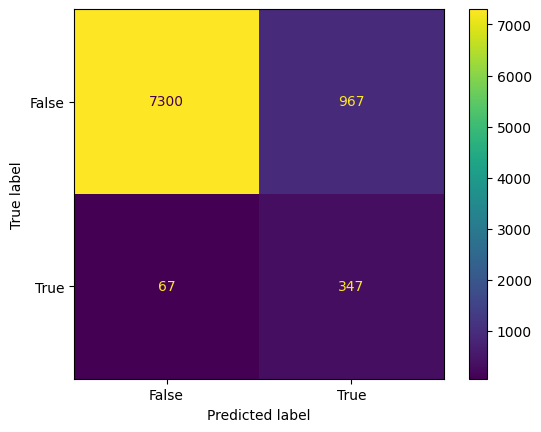

In [15]:
# Plot confusion
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

Classification Report

Precision vs Recall:

- The precision score is important when we want our model to only predict that a company will go bankrupt if its very confident in its prediction. 
- The recall score is important if we want to make sure to identify all the companies that will go bankrupt, even if that means being incorrect sometimes.

In [16]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.88      0.93      8267
        True       0.26      0.84      0.40       414

    accuracy                           0.88      8681
   macro avg       0.63      0.86      0.67      8681
weighted avg       0.96      0.88      0.91      8681



- Recall: How well the model predicts the observations that belong to the positive class. Of all the companies in the dataset that went bankrupt, our model predicted 87% correctly. 
- Precision: How well the model predicts the observations that belong to the positive class **without making the error of a flase positive**-The proportion that actually went bankrupt.

Creating an interactive dashboard that shows how company profit and losses change in relationship to your model's probability threshold. Start with the make_cnf_matrix function, which should calculate and print profit/losses, and display a confusion matrix. Then create a FloatSlider thresh_widget that ranges from 0 to 1. Finally combine your function and slider in the interact function.

In [ ]:
def make_cnf_matrix(threshold):
    
    y_pred_proba=model.predict_proba(X_test)[:, -1] 
    y_pred = y_pred_proba > threshold
    conf_matrix=confusion_matrix(y_test,y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"Profit: €{tp * 100_000_000}")
    print(f"Losses: €{fp * 250_000_000}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)


thresh_widget = widgets.FloatLogSlider(min=0, max=1,value=.5, step_size=0.05)

interact(make_cnf_matrix, threshold=thresh_widget);

In [19]:
# df.to_csv("data/df.csv", index=False)
# X.to_csv("data/X.csv", index=False)
# y.to_csv("data/y.csv", index=False)

# X_train.to_csv("data/X_train.csv", index=False)
# y_train.to_csv("data/y_train.csv", index=False)
# X_train_over.to_csv("data/X_train_over.csv", index=False)
# y_train_over.to_csv("data/y_train_over.csv", index=False)

# X_test.to_csv("data/X_test.csv", index=False)
# y_test.to_csv("data/y_test.csv", index=False)

Make Predictions Module

In [25]:
# Import your module
from  make_predictions import make_predictions

# Generate predictions
y_test_pred = make_predictions(
    data_filepath="data/X_test.csv",
    model_filepath="model-5-3.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (8681,)


0    False
1    False
2    False
3    False
4    False
Name: bankrupt, dtype: bool